# Fundamentals of Data Visualization
## World Population Dataset from Kaggle

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load dataset and explore
df = pd.read_csv('world_population.csv')
df.head()

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


In [3]:
df.describe()

,Rank,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
count,234.000000,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,234.000000,234.000000,234.000000
mean,117.500000,3.407441e+07,3.350107e+07,3.172996e+07,2.984524e+07,2.626947e+07,2.271022e+07,1.898462e+07,1.578691e+07,5.814494e+05,452.127044,1.009577,0.427051
std,67.694165,1.367664e+08,1.355899e+08,1.304050e+08,1.242185e+08,1.116982e+08,9.783217e+07,8.178519e+07,6.779509e+07,1.761841e+06,2066.121904,0.013385,1.714977
min,1.000000,5.100000e+02,5.200000e+02,5.640000e+02,5.960000e+02,6.510000e+02,7.000000e+02,7.330000e+02,7.520000e+02,1.000000e+00,0.026100,0.912000,0.000000
25%,59.250000,4.197385e+05,4.152845e+05,4.046760e+05,3.931490e+05,3.272420e+05,2.641158e+05,2.296142e+05,1.559970e+05,2.650000e+03,38.417875,1.001775,0.010000
50%,117.500000,5.559944e+06,5.493074e+06,5.307400e+06,4.942770e+06,4.292907e+06,3.825410e+06,3.141146e+06,2.604830e+06,8.119950e+04,95.346750,1.007900,0.070000
75%,175.750000,2.247650e+07,2.144798e+07,1.973085e+07,1.915957e+07,1.576230e+07,1.186923e+07,9.826054e+06,8.817329e+06,4.304258e+05,238.933250,1.016950,0.280000
max,234.000000,1.425887e+09,1.424930e+09,1.393715e+09,1.348191e+09,1.264099e+09,1.153704e+09,9.823725e+08,8.225344e+08,1.709824e+07,23172.266700,1.069100,17.880000


/var/folders/22/tbcdky3n0tb0v4n_hb4l_s0c0000gn/T/ipykernel_7789/69353550.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='2022 Population', y='Country/Territory', data=top_10_populous, palette='viridis')


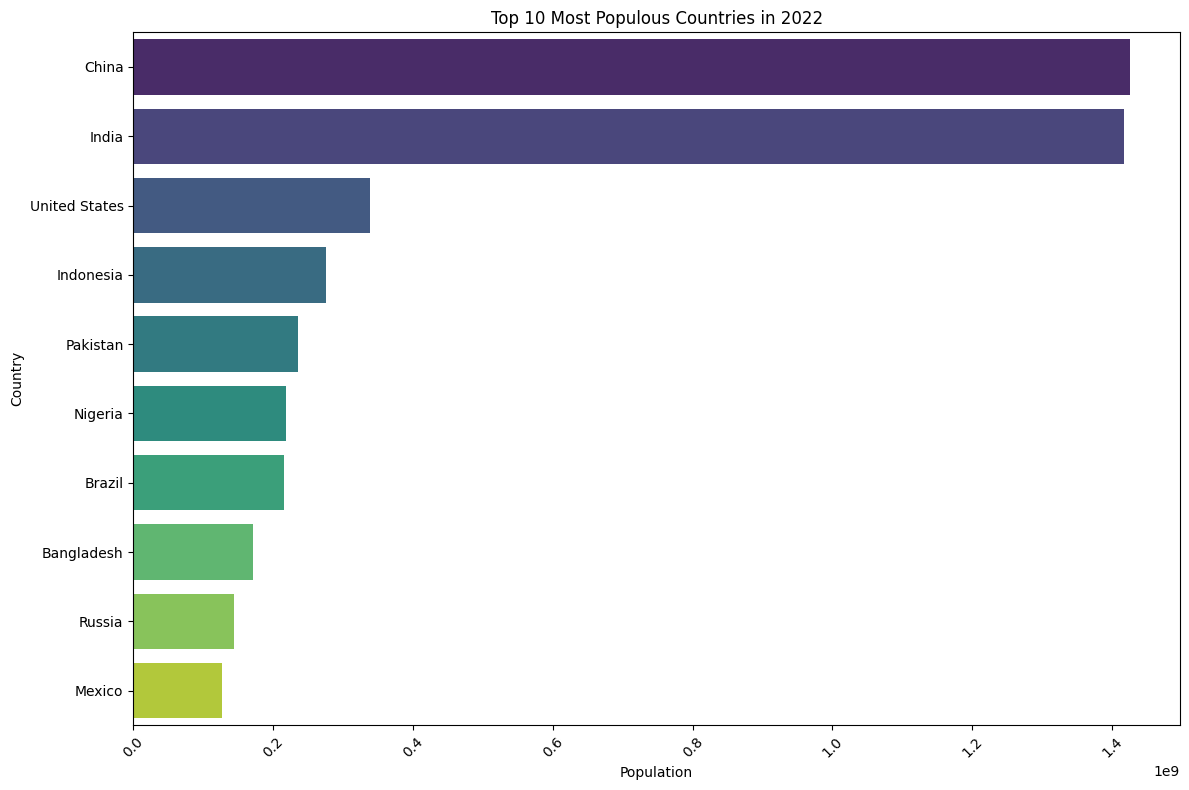

In [4]:
# Preparing data for the bar chart: Top 10 most populous countries in 2022
top_10_populous = df.nlargest(10, '2022 Population')

# Creating the bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='2022 Population', y='Country/Territory', data=top_10_populous, palette='viridis')
plt.title('Top 10 Most Populous Countries in 2022')
plt.xlabel('Population')
plt.ylabel('Country')
plt.xticks(rotation=45)
plt.tight_layout()

# Display the chart
plt.show()

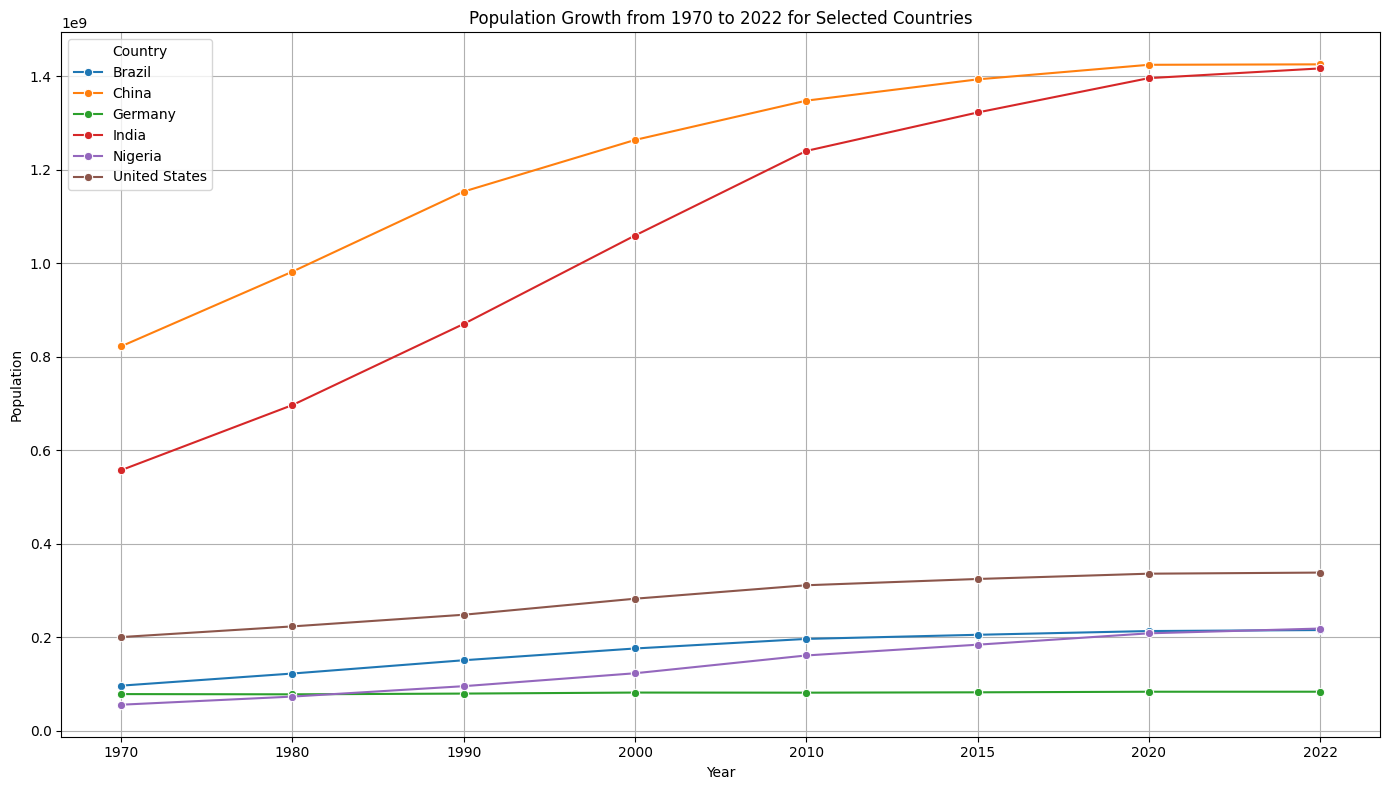

In [5]:
# Selecting a few countries for the line chart - one from each major continent for diversity
selected_countries = ['China', 'India', 'United States', 'Nigeria', 'Brazil', 'Germany']

# Filtering the dataset for the selected countries
filtered_df = df[df['Country/Territory'].isin(selected_countries)]

# Preparing data for the line chart
years = ['1970 Population', '1980 Population', '1990 Population', '2000 Population', '2010 Population', '2015 Population', '2020 Population', '2022 Population']
population_data = filtered_df.melt(id_vars=['Country/Territory'], value_vars=years, var_name='Year', value_name='Population')
population_data['Year'] = population_data['Year'].str[:4] # Extracting the year for plotting

# Creating the line chart
plt.figure(figsize=(14, 8))
sns.lineplot(data=population_data, x='Year', y='Population', hue='Country/Territory', marker='o')
plt.title('Population Growth from 1970 to 2022 for Selected Countries')
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend(title='Country')
plt.grid(True)
plt.tight_layout()

# Display the chart
plt.show()


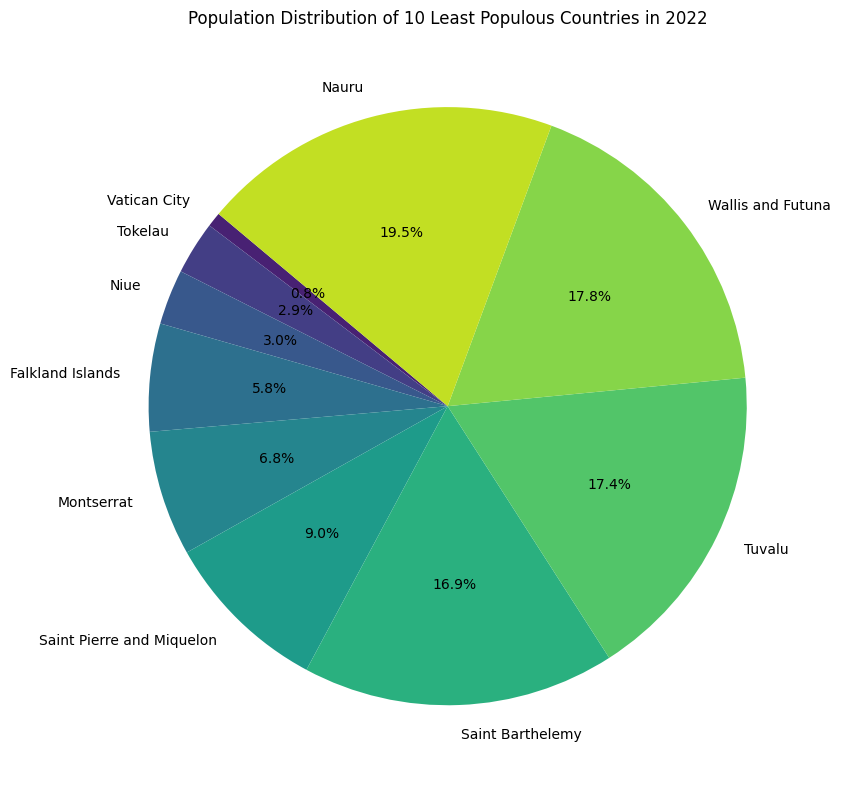

In [6]:
# Getting the 10 countries with the smallest populations
bottom_10_populous = df.nsmallest(10, '2022 Population')

# Creating the pie chart with a consistent color scheme
colors = sns.color_palette('viridis', n_colors=10) # Using the same color scheme as the bar chart

plt.figure(figsize=(10, 8))
plt.pie(bottom_10_populous['2022 Population'], labels=bottom_10_populous['Country/Territory'], autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Population Distribution of 10 Least Populous Countries in 2022')
plt.tight_layout()

# Display the chart
plt.show()


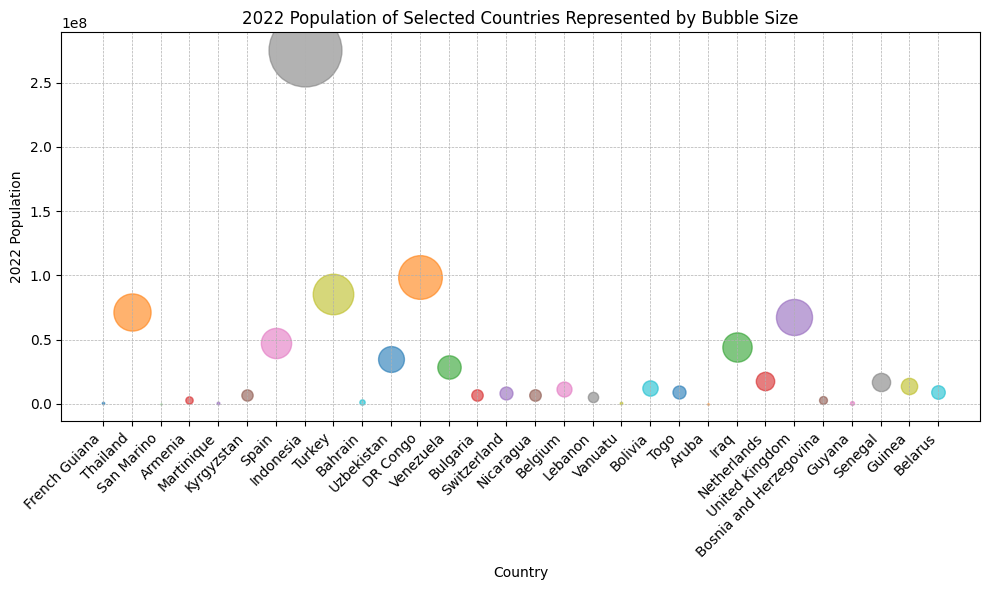

In [7]:
# Preparing data for the bubble chart
# Selecting a subset of countries for the visualization
subset_df = df.sample(n=30, random_state=42)

# Plotting
plt.figure(figsize=(10, 6))
for i in range(len(subset_df)):
    plt.scatter(subset_df['Country/Territory'].iloc[i], subset_df['2022 Population'].iloc[i], 
                s=subset_df['2022 Population'].iloc[i] / 100000, label=subset_df['Country/Territory'].iloc[i],
                alpha=0.6)

plt.xticks(rotation=45, ha='right')
plt.ylabel('2022 Population')
plt.xlabel('Country')
plt.title('2022 Population of Selected Countries Represented by Bubble Size')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()


# Show the plot
plt.show()

In [8]:
# Importing Plotly Express
import plotly.express as px

# Plotting the global population density choropleth map
plt.figure(figsize=(10, 6))
fig = px.choropleth(df,
                    locations='CCA3', 
                    color='Growth Rate',
                    hover_name='Country/Territory', 
                    color_continuous_scale=px.colors.sequential.Viridis,
                    title='Global Population Growth Rate by Country'
)
fig.update_layout(width=1000, height=600)

fig.show()

<Figure size 1000x600 with 0 Axes>

/var/folders/22/tbcdky3n0tb0v4n_hb4l_s0c0000gn/T/ipykernel_7789/2718277919.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




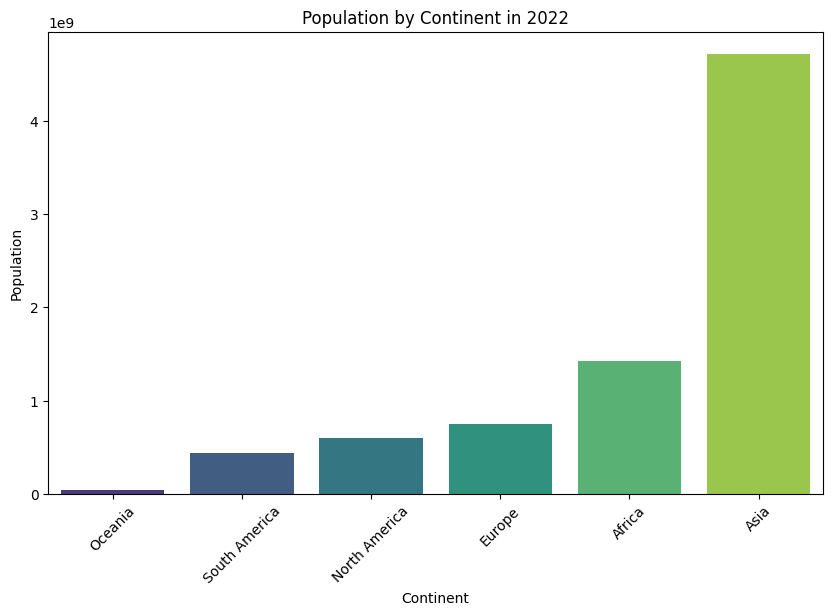

In [40]:

# Data for the bar plot (Population by Continent)
continent_population = df.groupby('Continent')['2022 Population'].sum().sort_values()

# Creating the Bar Plot with Viridian color palette
plt.figure(figsize=(10, 6))
sns.barplot(x=continent_population.index, y=continent_population.values, palette='viridis')
plt.title('Population by Continent in 2022')
plt.xlabel('Continent')
plt.ylabel('Population')
plt.xticks(rotation=45)
plt.show()


/var/folders/22/tbcdky3n0tb0v4n_hb4l_s0c0000gn/T/ipykernel_7789/1995529533.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




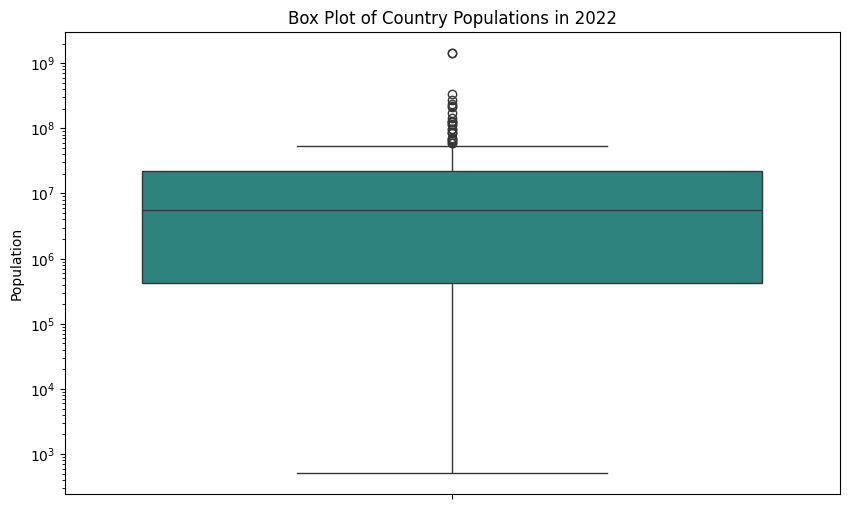

In [43]:
# Box Plot for Country Populations in 2022
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['2022 Population'], palette='viridis')
plt.title('Box Plot of Country Populations in 2022')
plt.ylabel('Population')
plt.yscale('log')  # Using a logarithmic scale due to wide range of population sizes
plt.show()


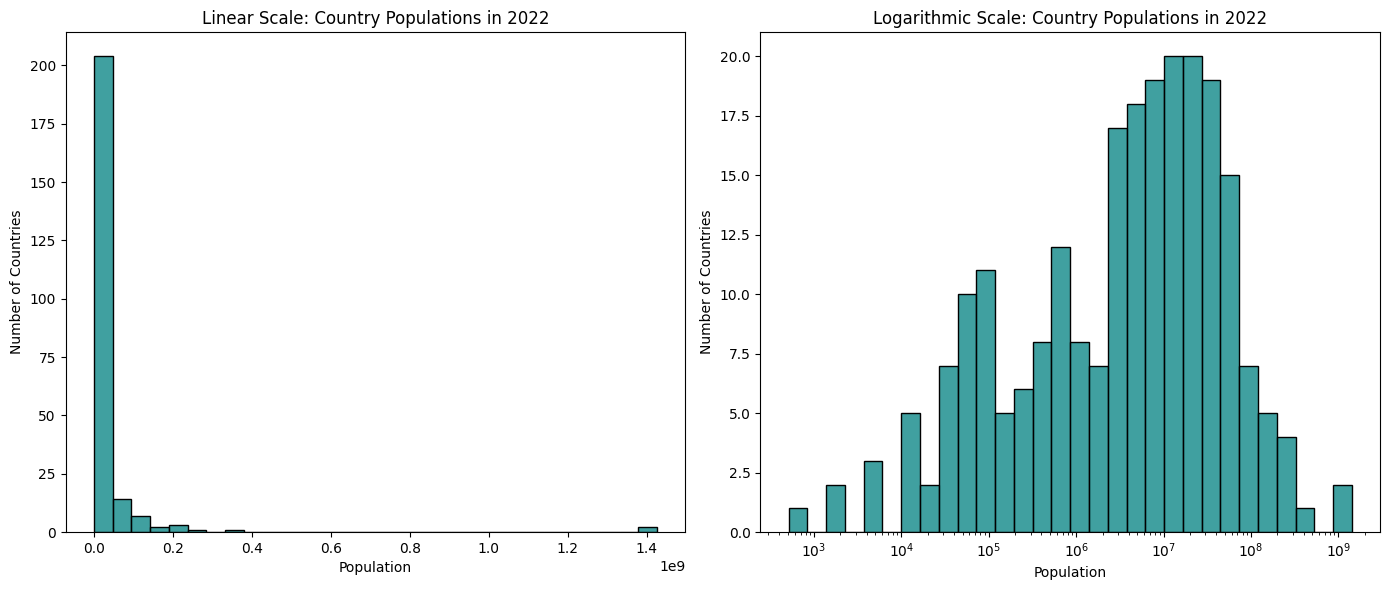

In [46]:
country_populations = df['2022 Population']

# Creating plots with linear and logarithmic scales
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Linear Scale Plot
sns.histplot(country_populations, bins=30, kde=False, ax=axes[0], color='teal')
axes[0].set_title('Linear Scale: Country Populations in 2022')
axes[0].set_xlabel('Population')
axes[0].set_ylabel('Number of Countries')

# Logarithmic Scale Plot
sns.histplot(country_populations, bins=30, kde=False, ax=axes[1], color='teal', log_scale=True)
axes[1].set_title('Logarithmic Scale: Country Populations in 2022')
axes[1].set_xlabel('Population')
axes[1].set_ylabel('Number of Countries')

plt.tight_layout()
plt.show()

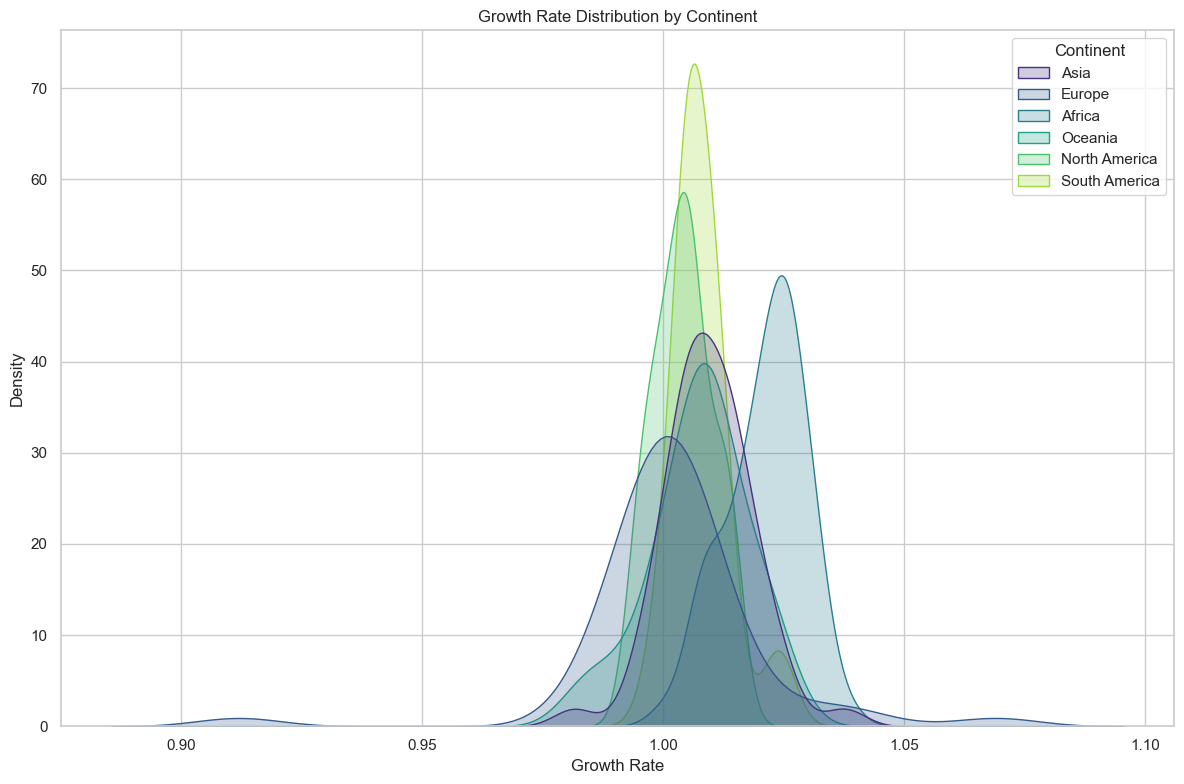

In [64]:
# create a ridgeline plot for the growth rate of countinents    
plt.figure(figsize=(12, 8))
sns.kdeplot(data=df, x='Growth Rate', hue='Continent', fill=True, common_norm=False, palette='viridis')
plt.title('Growth Rate Distribution by Continent')
plt.xlabel('Growth Rate')
plt.ylabel('Density')
plt.tight_layout()
plt.show()


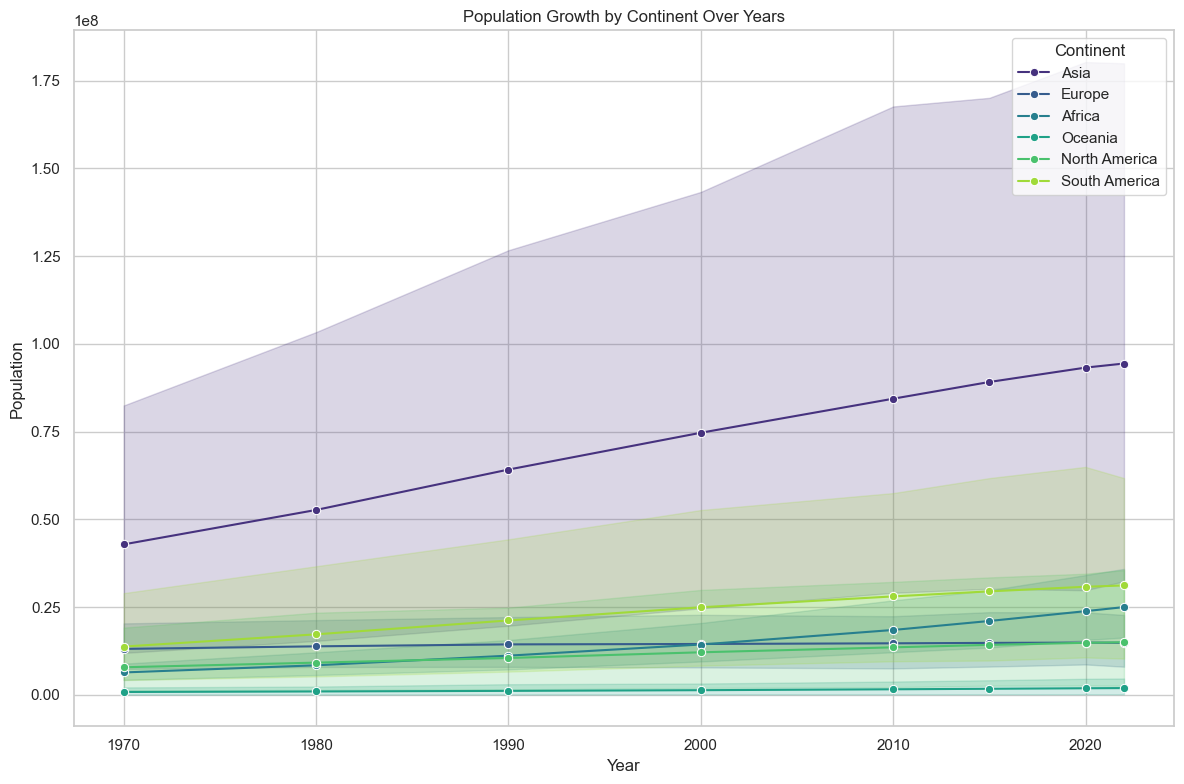

In [68]:

# Prepare the data for the ridgeline plot
years = ['1970 Population', '1980 Population', '1990 Population', 
         '2000 Population', '2010 Population', '2015 Population', 
         '2020 Population', '2022 Population']

# Melt the DataFrame
df_melted = df.melt(id_vars=['Continent'], value_vars=years, 
                    var_name='Year', value_name='Population')

# Convert 'Year' to a proper year format
df_melted['Year'] = df_melted['Year'].str.replace(' Population', '').astype(int)

# Convert Population to numeric explicitly
df_melted['Population'] = pd.to_numeric(df_melted['Population'], errors='coerce')

# Create the ridgeline plot
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_melted, x='Year', y='Population', hue='Continent', marker="o", palette='viridis')
plt.title('Population Growth by Continent Over Years')
plt.xlabel('Year')
plt.ylabel('Population')
plt.tight_layout()
plt.show()